# RED-BLACK tree

В худшем случае BST по своей эффективности при несбалансированности приближается к linked-list структуре. red-black tree is a binary search tree with one extra bit of storage per node: its color, which can be either RED or BLACK. By constraining the node colors on any simple path from the root to a leaf, red-black trees ensure that no such path is more than twice as long as any other, so that the tree is approximately balanced.\
Each node of the tree now contains the attributes color, key, left, right, and p.\

**A red-black tree is a binary tree that satisfies the following red-black properties:**
1. Every node is either red or black.
2. The root is black.
3. Every leaf (NIL) is black.
4. If a node is red, then both its children are black.
5. For each node, all simple paths from the node to descendant leaves contain the same number of black nodes.

In [11]:
# some utilities

class clr:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    UNDERLINE = '\033[4m'
    
    @staticmethod
    def bold(string):
        BOLD = '\033[1m'
        END = '\033[0m'
        return BOLD + str(string) + END
    
    @staticmethod
    def red(string):
        RED = '\033[91m'
        BOLD = '\033[1m'
        END = '\033[0m'
        return RED + BOLD + str(string) + END
    
    @staticmethod
    def black(string):
        return clr.bold(string)
    
    
print(clr.black("daa"))
print(clr.red("daa"))

daa
daa


###  Left rotation

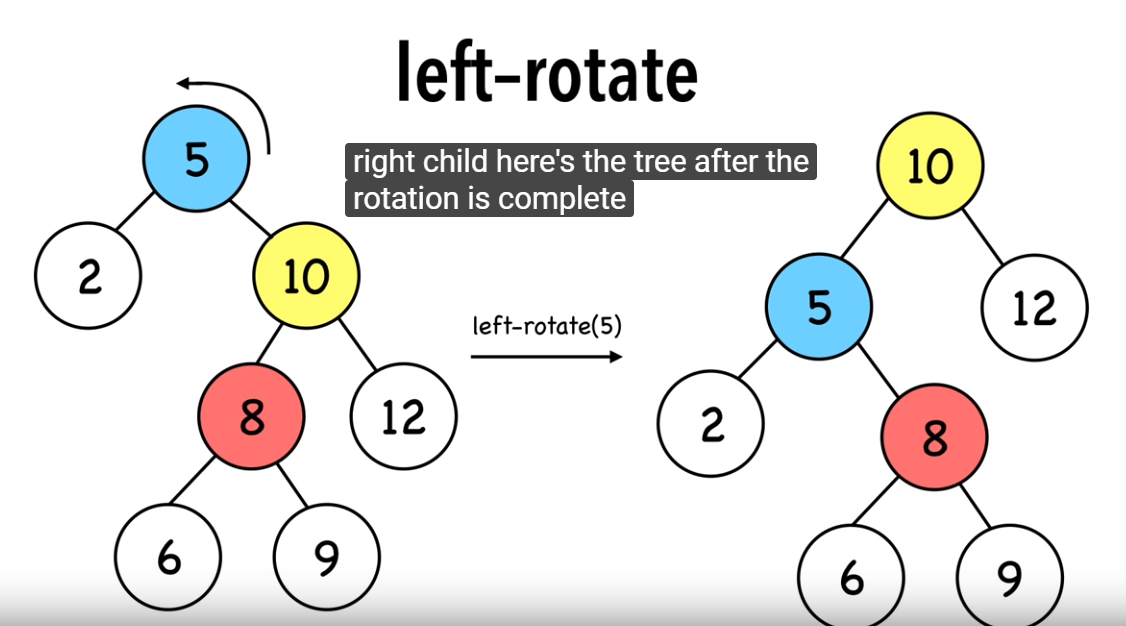

### Right totation
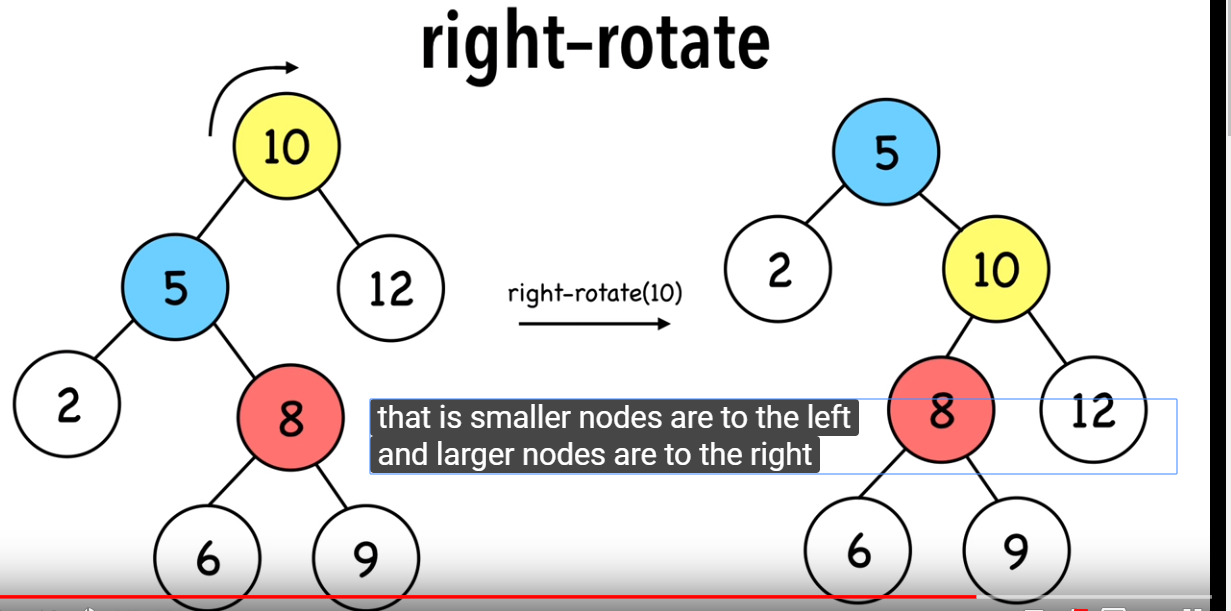

In [12]:
class Node():
    '''
    Ноды, которые будут использоваться при построении бинарного дерева поиска
    '''
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.p = None # parent 
        self.color = "red"
    
    def print_color(self, string, color):
        if color == "black":
            return clr.black(string)
        if color == "red":
            return clr.red(string)
        if color == None:
            return string
    
    def __repr__(self):
        '''
        print the object
        '''
        left = None if self.left is None else self.left.key
        lclr = None if self.left is None else self.left.color
        left = self.print_color(left, lclr)
        
        root = self.key
        rclr = None if self.key is None else self.color
        root = self.print_color(root, rclr)
        
        right = None if self.right is None else self.right.key
        rclr = None if self.right is None else self.right.color
        right = self.print_color(right, rclr)
        return f"{left} -- {root} -- {right}"
    

#binary search tree
class BST():
    def __init__(self):
        self.T = None
        self.root = None
        pass
    
    
    def left_rotate(self, x):
        '''
        Чтобы поправить нарушения свойств red-black tree, вращаем
        '''
        y = x.right # set y
        x.right = y.left # 
        if y.left != None:
            y.left.p = x
        y.p = x.p
        if x.p == None:
            self.root = y
        elif x == x.p.left:
            x.p.left = y
        else: x.p.right = y
        y.left = x # put x on y's left
        x.p = y
    
    def right_rotate(self, x):
        y = x.left # set y
        x.left = y.right # 
        if y.right != None:
            y.right.p = x
        y.p = x.p
        if x.p == None:
            self.root = y
        elif x == x.p.left:
            x.p.left = y
        else: x.p.right = y
        y.right = x # put x on y's left
        x.p = y
        
    
    
    def tree_insert(self, z):
        '''
        :param z: Node object, new inserted object
        '''
        y = None
        x = self.root
        while x != None:
            y = x
            if z.key < x.key:
                # искомое место вставки слева
                x = x.left 
            else:
                # искомое место вставки справа
                x = x.right
        z.p = y
        if y == None:
            self.root = z # tree was empty
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        z.left = None
        z.right = None
        z.color = "red"
        self.rb_insert_fixup(z)
            

    def rb_insert_fixup(z):
        while z.p.color == "red":
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.color == "red":
                    z.p.color = "black"
                    y.color = "black"
                    z.p.p.color = "red"
                    z = z.p.p
'''
test
    5
   / \
  4   7
    /  \
   6    8
       /
      7
'''
bst = BST()
nodes = list()
for i in [5,4,7,6,8,7]:
    z = Node(i)
    nodes.append(z)
    bst.tree_insert(z) # O(h) time on a tree of height h.




 inorder traversal -> 4 5 6 7 7 8 
 postorder traversal -> 4 6 7 8 7 5 
 preorder traversal -> 5 4 7 6 8 7 
None -- 4 -- None
None -- 4 -- None
tree max: 7 -- 8 -- None
tree_successor 6 -- 7 -- 8


In [22]:
import numpy as np
import time

array = np.random.uniform(0, 100, 30000)
search = array[1002]
res = []
start = time.time()
for j in array:
    for i in array:
        if search == i:
            res.append(i)
end = time.time()
print(end - start)

117.29444622993469
